--- Original DataFrame Head ---
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  

--- Original DataFrame Description ---
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   11

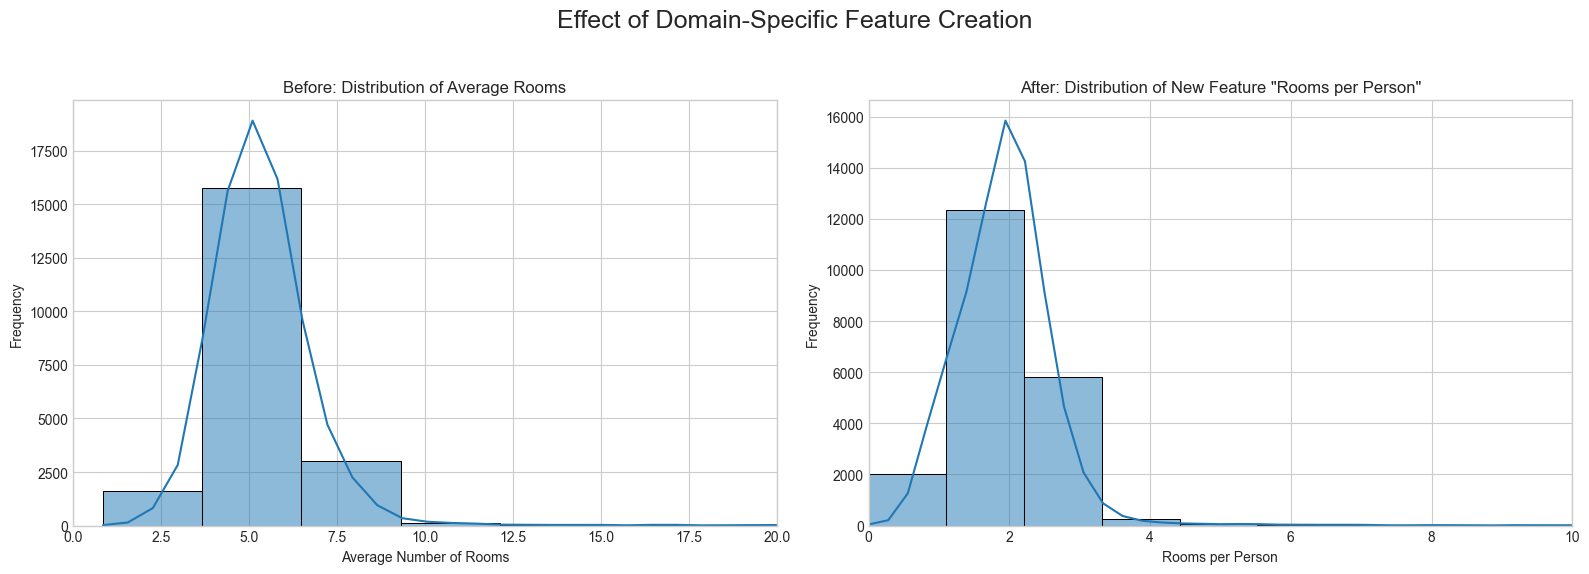



--- Head of New Features and Target Variable ---
   Rooms_per_person  Bedrms_ratio  Lat_Lon_interaction  MedHouseVal
0          2.732919      0.146591           -4630.0724        4.526
1          2.956685      0.155797           -4627.2492        3.585
2          2.957661      0.129516           -4626.7840        3.521
3          2.283154      0.184458           -4627.1625        3.413
4          2.879646      0.172096           -4627.1625        3.422


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

# ---
# What are Domain-Specific Features and When to Use Them?
# ---
#
# Domain-specific feature engineering is the process of creating new features
# from existing data using knowledge from a particular field (e.g., finance,
# real estate, physics). Instead of letting the model figure out all the
# relationships, you guide it by providing more meaningful, high-level features.
#
# When to use this technique:
# - When you have expertise in the problem's domain.
# - When you believe combining or transforming existing features can create
#   more predictive signals. For example, creating a "debt-to-income ratio"
#   in a financial dataset.
# - When you want to make your model more interpretable.
#
# Data Requirements:
# - The dataset must contain features that can be logically combined or
#   transformed based on domain knowledge. For instance, datasets with
#   timestamps, geographical coordinates, or economic indicators are often
#   good candidates.
#
# ---
# 1. Load a Relevant Dataset
# ---
# We'll use the California Housing dataset from scikit-learn. This dataset
# is suitable because it contains features like median income, house age,
# average number of rooms, and population, which we can combine based on
# real estate and demographic common sense.

# Fetch the dataset
california_housing = fetch_california_housing(as_frame=True)
df = california_housing.frame

# Display the original data's first few rows and a description
print("--- Original DataFrame Head ---")
print(df.head())
print("\n--- Original DataFrame Description ---")
print(df.describe())


# ---
# 2. Select Features and Apply Domain-Specific Transformations
# ---
# We will create new features based on our understanding of what might
# influence housing prices. For example, the ratio of bedrooms to total rooms
# or the average number of rooms per person could be more informative than
# the raw numbers alone.

# Create a copy to avoid modifying the original DataFrame during transformations
df_transformed = df.copy()

# Feature 1: Rooms per Person
# This could indicate if a block has larger family homes vs. smaller,
# single-occupant homes.
df_transformed['Rooms_per_person'] = df_transformed['AveRooms'] / df_transformed['AveOccup']

# Feature 2: Bedrooms Ratio
# This calculates the proportion of rooms that are bedrooms. A lower ratio might
# suggest more living/dining space.
df_transformed['Bedrms_ratio'] = df_transformed['AveBedrms'] / df_transformed['AveRooms']

# Feature 3: Location-based feature (simplified)
# We can create a very simple feature that combines latitude and longitude
# to represent a general location, which might capture regional price differences.
df_transformed['Lat_Lon_interaction'] = df_transformed['Latitude'] * df_transformed['Longitude']


# ---
# 3. Show the Result
# ---
# We will now print the head of the new DataFrame to show the newly created columns.
# We will also visualize the distribution of one of our new features to see what it looks like.

print("\n\n--- Transformed DataFrame Head with New Features ---")
print(df_transformed.head())


# Create a "before-and-after" visualization for the 'AveRooms' feature
# and our new 'Rooms_per_person' feature.
plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Before: Distribution of Average Rooms
sns.histplot(df['AveRooms'], bins=50, kde=True, ax=axes[0])
axes[0].set_title('Before: Distribution of Average Rooms')
axes[0].set_xlabel('Average Number of Rooms')
axes[0].set_ylabel('Frequency')
# It's common for real-world data to have long tails, so we'll clip the x-axis for better visualization
axes[0].set_xlim(0, 20)


# After: Distribution of our new "Rooms per Person" feature
sns.histplot(df_transformed['Rooms_per_person'], bins=50, kde=True, ax=axes[1])
axes[1].set_title('After: Distribution of New Feature "Rooms per Person"')
axes[1].set_xlabel('Rooms per Person')
axes[1].set_ylabel('Frequency')
axes[1].set_xlim(0, 10)

plt.suptitle('Effect of Domain-Specific Feature Creation', fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Display the head of the DataFrame containing only the new features and the target variable
print("\n\n--- Head of New Features and Target Variable ---")
result_df = df_transformed[['Rooms_per_person', 'Bedrms_ratio', 'Lat_Lon_interaction', 'MedHouseVal']]
print(result_df.head())
